In [22]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

circuits = pd.read_csv("circuits.csv")
constructor = pd.read_csv("constructors.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

In [15]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
589076,1144,857,54,10,1:27.731,87731
589077,1144,857,55,10,1:27.781,87781
589078,1144,857,56,10,1:27.816,87816
589079,1144,857,57,10,1:28.554,88554


In [16]:

races['date'] = pd.to_datetime(races['date'])
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


**ALL INFORMATION ABOUT 1 Race RACEID=1143**

In [17]:
target_race = races[races["raceId"] == 1143]
target_race

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


Text(0, 0.5, 'Avg Lap Time (ms)')

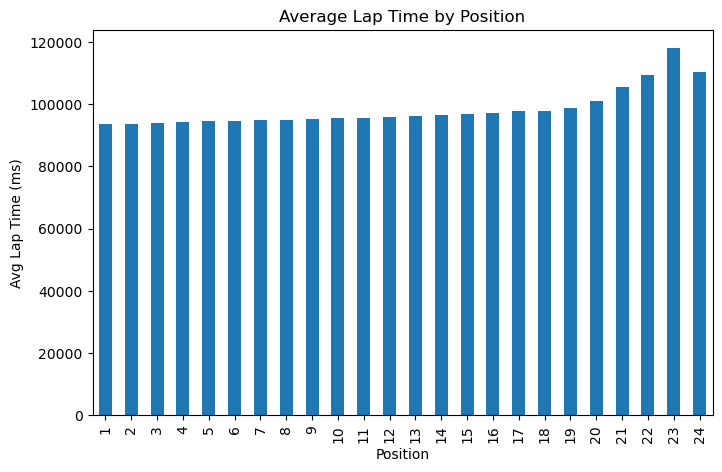

In [18]:
avg_lap_time_by_position = lap_times.groupby('position')['milliseconds'].mean()

plt.figure(figsize=(8, 5))
avg_lap_time_by_position.plot(kind='bar')
plt.title('Average Lap Time by Position')
plt.xlabel('Position')
plt.ylabel('Avg Lap Time (ms)')

The bar chart shows how lap times varies by race positions but normally the earlier in the lap the faster u tend to finish, unless you're in lap 23 then... goodluck!

**TOP 10 drivers by wins**

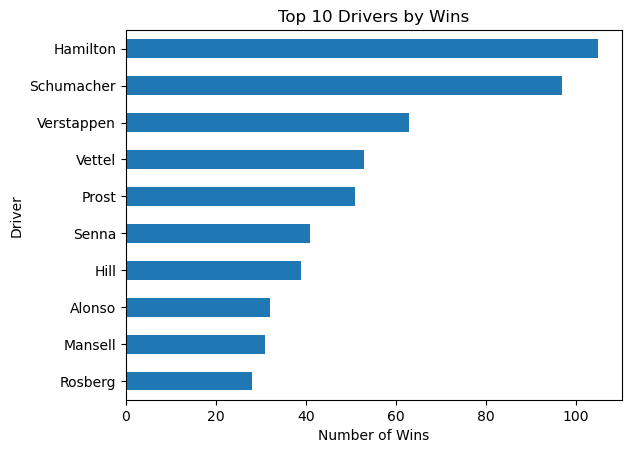

In [23]:
results = results.merge(drivers, on='driverId')

# Count wins (positionOrder == 1)
wins = results[results['positionOrder'] == 1]
win_counts = wins['surname'].value_counts().head(10)


win_counts.sort_values().plot(kind='barh', title="Top 10 Drivers by Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Driver")
plt.show()

From the chart above, we can see that Lewis Hamilton leads the top 10 drivers by wins, followed closely by Michael Schumacher. 
Max Verstappen, Sebastian Vettel, and Alain Prost also have significant numbers of wins, showcasing their dominance in Formula 1. T
he chart highlights the achievements of these legendary drivers and their impact on the sport.

TOP 10 DRIVERS BY FINISHES

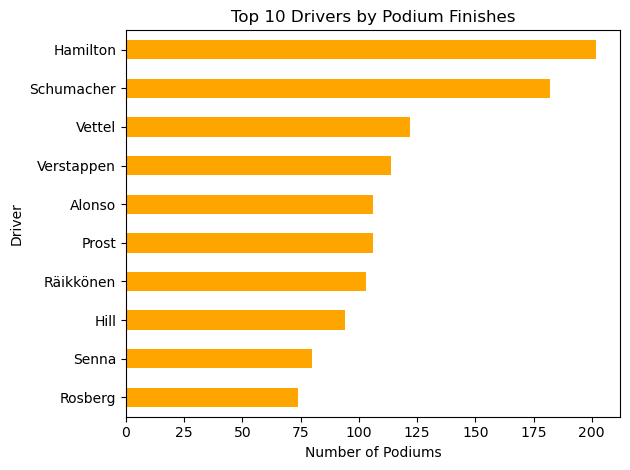

In [25]:
# Podium finish: positionOrder in [1, 2, 3]
podiums = results[results['positionOrder'] <= 3]
podium_counts = podiums['surname'].value_counts().head(10)

# Plotting
podium_counts.sort_values().plot(kind='barh', color='orange', title="Top 10 Drivers by Podium Finishes")
plt.xlabel("Number of Podiums")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()


From the chart above for the top 10 drivers by podium finishes, we can see that Lewis Hamilton leads with the highest number of podiums, 
followed by Michael Schumacher and Sebastian Vettel. 
Max Verstappen and Alain Prost also have significant podium finishes, 
showcasing their consistency and skill in Formula 1. 
The chart highlights the dominance of these drivers in securing top-three finishes throughout their careers.